In [3]:
"""
Created Using Python 3.6
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def load_soliton_data(filename):
    """
    helper function to load soliton data from .mat file
    """
    from scipy.io import loadmat
    data = loadmat(filename)
    A0 = data["A0"]
    A0_error = data["A0_error"]
    U0 = data["U0"]
    A = data["Amat"]
    t = data["t_vec"]
    z = data["z_vec"]
    return t, z, A, U0, A0, A0_error

In [5]:
t, z, A, U0, A0, A0_error = load_soliton_data("data/expData07.mat")

In [6]:
A.shape

(227, 4418)

In [7]:
t.shape

(1, 227)

In [8]:
z.shape

(1, 4418)

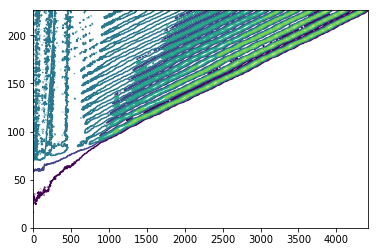

In [9]:
plt.contour(A)

In [10]:
def getSpeed(A, n=100000):
    import random
    speed = []
    for i in range(n):
        
        # First choose two random t-values
        t1 = random.choice(range(len(A)))
        t2 = random.choice(range(len(A)))
        
        r1 = A[t1, :]
        r2 = A[t2, :]
        
        # Find first z-value on 
        x1 = np.argwhere(r1 - 1 <= .5) - 1 
        x2 = np.argwhere(r2 - 1 <= .5) - 1
        
        if x1.size > 0 and x2.size > 0 and t1 != t2:
            speed.append((x1[0]-x2[0])/(t1-t2))
    
    return np.mean(speed)

In [23]:
1/getSpeed(A)/U0

array([[0.4139384]])

In [20]:
def speedAmplitudeRelation(A0):
    #return (A0**2-1-2*A0**2*np.log(A0))/(2*A0-1-A0**2)
    return (-A0*np.log(A0)-A0+1)/(2-2*A0)

In [21]:
speedAmplitudeRelation(A0)

array([[1.7107945]])

In [70]:
def eulers(zeta_0, g, c, del_f, f, n=100):
    Z = [zeta_0]
    f_0 = f(zeta_0)
    F = [f_0]
    zeta = zeta_0
    
    for i in range(n):
        zeta = zeta + del_f/g(f_0, 0)
        Z.append(zeta)
        f_0 = f(zeta)
        F.append(f_0)